<a href="https://colab.research.google.com/github/hargurjeet/Recommedation-Systems/blob/main/Anime_Recommendation_Collborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anime Recommendations Systems**

Recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them.

One Such recommender system I have build in the notebooks by applying User Based Collborative Filtering.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Expainatory Data Analysis](#2)
  3. [Implementing User Based Collborative Filtering](#3)
  4. [Making Recommedations](#4)
  5. [Summary](#5)
  6. [Future Work](#6)
  7. [References](#7)

# <font color="white" size=+2.0><b>1: AboutDataset</b></font> <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/CooperUnion/anime-recommendations-database'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


 24%|██▍       | 6.00M/25.0M [00:00<00:00, 59.9MB/s]

100%|██████████| 25.0M/25.0M [00:00<00:00, 63.8MB/s]


In [ ]:
df=pd.read_csv("/content/anime-recommendations-database/anime.csv")
df1=pd.read_csv("/content/anime-recommendations-database/rating.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df1.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
merged_df=df1.merge(df[['anime_id','name']],how='left', on='anime_id')
merged_df.shape
merged_df.head()

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season


In [ ]:
merged_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


# <font color="white" size=+2.0><b>2:Explainatory Data Analysis</b></font> <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
ratings = pd.DataFrame(merged_df.groupby(['name', 'anime_id'])['rating'].mean())
ratings.head()

,,rating
name,anime_id,
&quot;0&quot;,20707,2.769231
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",25627,0.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7669,5.774936
&quot;Bungaku Shoujo&quot; Memoire,8481,6.155748
&quot;Bungaku Shoujo&quot; Movie,6408,6.457980


In [ ]:
ratings['number_of_ratings'] = merged_df.groupby(['name', 'anime_id'])['rating'].count()
ratings.head()

,,rating,number_of_ratings
name,anime_id,,
&quot;0&quot;,20707,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",25627,0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7669,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,8481,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6408,6.457980,1535


In [ ]:
ratings = ratings.reset_index()
ratings.head()

,name,anime_id,rating,number_of_ratings
0,&quot;0&quot;,20707,2.769231,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,25627,0.000000,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,7669,5.774936,782
3,&quot;Bungaku Shoujo&quot; Memoire,8481,6.155748,809
4,&quot;Bungaku Shoujo&quot; Movie,6408,6.457980,1535


In [ ]:
ratings[ratings.name=='Naruto']

,name,anime_id,rating,number_of_ratings
6788,Naruto,20,6.571726,25925


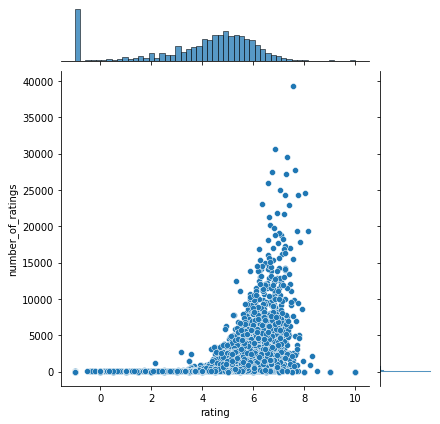

In [ ]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings);

In [ ]:
merged_df.shape

(7813737, 4)

In [ ]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,name,anime_id,rating,number_of_ratings
1835,Death Note,1535,7.556177,39340
9518,Sword Art Online,11757,6.863159,30583
8866,Shingeki no Kyojin,16498,7.314089,29584
1548,Code Geass: Hangyaku no Lelouch,1575,7.641244,27718
2360,Elfen Lied,226,6.753508,27506
387,Angel Beats!,6547,7.278667,27183
6788,Naruto,20,6.571726,25925
2597,Fullmetal Alchemist,121,7.056048,25032
2598,Fullmetal Alchemist: Brotherhood,5114,8.028933,24574
10115,Toradora!,4224,7.234938,24283


In [ ]:
highly_rated_anime = ratings[ratings.number_of_ratings>=1000].sort_values(by='number_of_ratings')
highly_rated_anime.head()

,name,anime_id,rating,number_of_ratings
121,Aa! Megami-sama!: Sorezore no Tsubasa Specials,2198,5.636000,1000
8880,Shining Tears X Wind,2031,5.014940,1004
1232,Cardcaptor Sakura Specials,2424,5.230846,1005
1899,Detective Conan Movie 11: Jolly Roger in the D...,2171,5.604975,1005
1900,Detective Conan Movie 12: Full Score of Fear,4447,5.761431,1006


In [ ]:
highly_rated_anime.shape

(1721, 4)

In [ ]:
restricted_anime_dataset = merged_df.merge(highly_rated_anime['anime_id'], how='inner', on='anime_id')
restricted_anime_dataset.head()

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,3,20,8,Naruto
2,5,20,6,Naruto
3,6,20,-1,Naruto
4,10,20,-1,Naruto


In [ ]:
Ten_thousand_users = restricted_anime_dataset[restricted_anime_dataset.user_id<=10000]

In [ ]:
Ten_thousand_users

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,3,20,8,Naruto
2,5,20,6,Naruto
3,6,20,-1,Naruto
4,10,20,-1,Naruto
...,...,...,...,...
6607390,9032,306,9,Abenobashi Mahou☆Shoutengai
6607391,9047,306,-1,Abenobashi Mahou☆Shoutengai
6607392,9500,306,7,Abenobashi Mahou☆Shoutengai
6607393,9891,306,6,Abenobashi Mahou☆Shoutengai


# <font color="white" size=+2.0><b>3: Implementing User Based Collborative Filtering</b></font> <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
anime_matrix = Ten_thousand_users.pivot_table(index='user_id', columns='name', values='rating')
anime_matrix.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Trilogy,.hack//Liminality,.hack//Quantum,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,11eyes: Momoiro Genmutan,30-sai no Hoken Taiiku,91 Days,A Kite,A-Channel,AKB0048,Aa! Megami-sama!,Aa! Megami-sama! (TV),Aa! Megami-sama! (TV) Specials,Aa! Megami-sama! Movie,Aa! Megami-sama!: Sorezore no Tsubasa,Aa! Megami-sama!: Sorezore no Tsubasa Specials,Aa! Megami-sama!: Tatakau Tsubasa,Abenobashi Mahou☆Shoutengai,Absolute Duo,Accel World,Accel World EX,Accel World: Acchel World.,Acchi Kocchi (TV),Acchi Kocchi (TV): Place=Princess,Afro Samurai,Afro Samurai: Resurrection,Ai Yori Aoshi,Ai Yori Aoshi: Enishi,Ai no Kusabi,Air,Air Gear,Air Gear Special,Air Gear: Kuro no Hane to Nemuri no Mori - Break on the Sky,Air Movie,Air in Summer,...,Yume-iro Pâtissière,Yumekui Merry,Yumeria,Yuru Yuri,Yuru Yuri San☆Hai!,Yuru Yuri♪♪,Yuuki Yuuna wa Yuusha de Aru,Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,Yuu☆Yuu☆Hakusho,Yuyushiki,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! (1999),Yu☆Gi☆Oh! 5D&#039;s,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh!: Duel Monsters GX,Yu☆Gi☆Oh!: Hikari no Pyramid,Zan Sayonara Zetsubou Sensei,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zero no Tsukaima: Princesses no Rondo - Yuuwaku no Sunahama,Zetman,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoids,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,ef: A Tale of Melodies.,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0,NaN,2.0,NaN,NaN,3.0,5.0,NaN,7.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


Making recommendation - Example movie- Naruto

In [ ]:
#Fetching ratings for Naruto
Naruto_user_rating = anime_matrix['Naruto']

In [ ]:
Naruto_user_rating

user_id
1       -1.0
2        NaN
3        8.0
4        NaN
5        6.0
        ... 
9996     NaN
9997     NaN
9998     NaN
9999     NaN
10000    NaN
Name: Naruto, Length: 9969, dtype: float64

In [ ]:
#Finding the correlation with different movies
similar_to_Naruto=anime_matrix.corrwith(Naruto_user_rating)

In [ ]:
#Observing the result
similar_to_Naruto.head()

name
&quot;Bungaku Shoujo&quot; Movie    0.635140
.hack//G.U. Trilogy                 0.758337
.hack//Liminality                   0.592139
.hack//Quantum                      0.549460
.hack//Roots                        0.684646
dtype: float64

# <font color="white" size=+2.0><b>4: Making Recommendation</b></font> <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
#creating dataframe to bring in #of ratings
corr_Naruto = pd.DataFrame(similar_to_Naruto, columns=['Correlation'])
corr_Naruto.dropna(inplace=True)
corr_Naruto.head()

,Correlation
name,
&quot;Bungaku Shoujo&quot; Movie,0.635140
.hack//G.U. Trilogy,0.758337
.hack//Liminality,0.592139
.hack//Quantum,0.549460
.hack//Roots,0.684646


In [ ]:
a=corr_Naruto.reset_index()
a

,name,Correlation
0,&quot;Bungaku Shoujo&quot; Movie,0.635140
1,.hack//G.U. Trilogy,0.758337
2,.hack//Liminality,0.592139
3,.hack//Quantum,0.549460
4,.hack//Roots,0.684646
...,...,...
1716,xxxHOLiC,0.561584
1717,xxxHOLiC Kei,0.596754
1718,xxxHOLiC Movie: Manatsu no Yoru no Yume,0.512466
1719,xxxHOLiC Rou,0.473822


In [ ]:
ratings

,name,anime_id,rating,number_of_ratings
0,&quot;0&quot;,20707,2.769231,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,25627,0.000000,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,7669,5.774936,782
3,&quot;Bungaku Shoujo&quot; Memoire,8481,6.155748,809
4,&quot;Bungaku Shoujo&quot; Movie,6408,6.457980,1535
...,...,...,...,...
11192,xxxHOLiC Kei,3091,6.720774,3413
11193,xxxHOLiC Movie: Manatsu no Yoru no Yume,793,6.313742,2365
11194,xxxHOLiC Rou,6864,6.403173,1513
11195,xxxHOLiC Shunmuki,4918,6.238602,1974


In [ ]:
b=a.merge(ratings, how='left', on='name')[['name', 'Correlation', 'number_of_ratings']]

In [ ]:
b

,name,Correlation,number_of_ratings
0,&quot;Bungaku Shoujo&quot; Movie,0.635140,1535
1,.hack//G.U. Trilogy,0.758337,1118
2,.hack//Liminality,0.592139,1260
3,.hack//Quantum,0.549460,1231
4,.hack//Roots,0.684646,2104
...,...,...,...
1716,xxxHOLiC,0.561584,5475
1717,xxxHOLiC Kei,0.596754,3413
1718,xxxHOLiC Movie: Manatsu no Yoru no Yume,0.512466,2365
1719,xxxHOLiC Rou,0.473822,1513


In [ ]:
b[b['number_of_ratings'] >1000 ].sort_values(by='Correlation', ascending=False).head(10)

,name,Correlation,number_of_ratings
1069,Naruto,1.000000,25925
1462,Slayers: The Motion Picture,0.915264,1027
742,Juubee Ninpuuchou: Ryuuhougyoku-hen,0.864401,1027
458,Final Fantasy: Unlimited,0.856416,1097
302,DNA²,0.843232,1216
920,Lodoss-tou Senki,0.838783,1087
1450,Shuffle! Memories,0.819067,1566
233,Captain Tsubasa: Road to 2002,0.817485,1056
560,Groove Adventure Rave,0.816503,1792
913,Lamune,0.814119,1281


Next - User based recommendation - On Demand

# <font color="white" size=+2.0><b>5: Summary</b></font> <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="white" size=+2.0><b>6: Future Work</b></font> <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="white" size=+2.0><b>7: Reference</b></font> <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 